# Python_Week_7_Exercise

Data from https://www.dr.dk/



In [10]:
# making requests in this block
import warnings
warnings.filterwarnings('ignore')

import bs4
import requests
import re

res = requests.get("https://www.dr.dk")
res.raise_for_status()
soup = bs4.BeautifulSoup(res.text, 'html.parser')



res2 = requests.get("https://www.dr.dk/nyheder/indland/status-paa-coronavirus-lige-nu")
res2.raise_for_status()
soup2 = bs4.BeautifulSoup(res2.text,"html.parser")

1) Use webscrabing to find out how many headlines contain the word 'corona'.

In [13]:
match1 = soup.select(".dre-title-text")
match2 = soup.select(".hydra-front-page-top-zone__link")
match3 = soup.select(".dre-title-text__prefix")


corona = re.compile(r"corona")

r1 = corona.findall(str(match1))
r2 = corona.findall(str(match2))
r3 = corona.findall(str(match3))


print(r1)
print(r2)
print(r3)

# Der er flere steder hvor den ikke finder alle typer for headlines med de første 3 matches,
# fandt lidt ekstra med dem her men det var lidt at gå i detalje med opgaven

#match4 = soup.select(".dre-title-text__prefixed")
#match5 = soup.select(".dre-teaser-title__text")

#r4 = corona.findall(str(match4))
#r5 = corona.findall(str(match5))

#print(r4)
#print(r5)

['corona', 'corona', 'corona', 'corona', 'corona', 'corona', 'corona']
['corona']
[]


2) Use regex to make a list of all words that occur just before and just after coronavirus in the article at https://www.dr.dk/nyheder/indland/status-paa-coronavirus-lige-nu. 
As in "... xxx coronavirus yyy..." find the words xxx and yyy. 

In [67]:
article = soup2.select('article[class="dre-article cXenseParse"]> div.dre-structured-article')
coronareg = re.compile(r'(\w+) coronavirus (\w+)')

results = coronareg.findall(str(article))

print(set(results))

{('på', 'lige'), ('på', 'i'), ('mod', 'og'), ('om', 'i')}


3) How many hrefs link to a sub page on dr.dk/nyheder/..., dr.dk/sporten/..., dr.dk/mad/... and dr.dk/musik/...
Make a pie chart to show the amount of sports news, food news, music news and regular news.

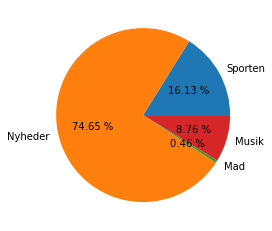

Sporten:  35
Nyheder:  162
Mad:  1
Musik:  19


In [11]:
from matplotlib import pyplot as plt

sporten = re.compile(r'www.dr.dk/sporten/')
nyheder = re.compile(r'www.dr.dk/nyheder/')
mad = re.compile(r'www.dr.dk/mad/')
musik = re.compile(r'www.dr.dk/musik/')

s_len = len(sporten.findall(res.text))
n_len = len(nyheder.findall(res.text))
mad_len = len(mad.findall(res.text))
musik_len = len(musik.findall(res.text))

#fig = plt.figure(figsize=(5,5))
fig = plt.figure()

labels = ["Sporten","Nyheder","Mad","Musik"]
values = [s_len,n_len,mad_len,musik_len]

plt.pie(values,labels=labels,autopct='%.2f %%')
plt.show()
print("Sporten: ", s_len)
print("Nyheder: ", n_len)
print("Mad: ", mad_len)
print("Musik: ", musik_len)




4) Use Selenium to click into the first news article under "seneste nyt" and print the first parapgraph of the article.

![alt text](https://i.imgur.com/H0iye0S.png)

In [12]:
# Not completed. Having trouble using selenium